# Topic Modeling

We will be working with a dataset of  quora questions (please download from eLearning) that have no labeled cateogry and attempt to find representtaive topics for the questions. We will try different topic modeling appraoches.
The choice of number of topics will depend on what number gives you meaningful topics. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pathlib import Path

In [3]:
data = Path('/content/gdrive/MyDrive/NLP/2_Lecture')

In [4]:
import pandas as pd

qoura_questions = pd.read_csv(data/"quora_questions.csv")
#qoura_questions = qoura_questions[0:10000]

In [11]:
qoura_questions.shape

(404289, 1)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(qoura_questions, test_size=0.2)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [9]:
train_vectors = tfidf.fit_transform(train['Question']) 
train_vectors.shape # (documents, vocab)

(323431, 34928)

In [ ]:
test_vectors = tfidf.transform(test['Question']) 

In [ ]:
import numpy as np
vocab = np.array(tfidf.get_feature_names())

In [ ]:
vocab.shape

(34939,)

In [ ]:
vocab[1000:1050]

array(['73', '730', '732', '74', '741', '747', '747s', '75', '750',
       '7500u', '750d', '750w', '75g', '75k', '76', '760', '77', '771',
       '775', '777', '778', '78', '786', '787', '79', '797', '7am',
       '7cpc', '7d', '7ghz', '7k', '7kgs', '7km', '7m', '7mm', '7pm',
       '7th', '7up', '7x', '7y', '7z', '80', '800', '8000', '80000',
       '8009315079', '800b0001', '800m', '801', '802'], dtype='<U26')

# Truncated SVD


In [ ]:
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=7,random_state=42)

In [ ]:
# fit the model to train data
model.fit(train_vectors)

TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5, random_state=42,
             tol=0.0)

In [ ]:
len(tfidf.get_feature_names())

34939

In [ ]:
import random 
for i in range(10):
    random_word_id = random.randint(0,4494)
    print(tfidf.get_feature_names()[random_word_id])

bigots
airfoil
145
300m
ahoy
710
317
176
1997
apk


In [ ]:
len(model.components_)

7

In [ ]:
model.components_

array([[ 1.60171597e-04,  8.40682153e-03,  2.59957240e-04, ...,
         1.29033468e-06,  3.23678494e-05,  1.29033468e-06],
       [ 2.71444555e-04,  2.54141435e-03, -1.11195628e-04, ...,
         1.96127475e-06,  2.65928064e-04,  1.96127475e-06],
       [-1.18677650e-04, -1.21777184e-04, -1.18206313e-05, ...,
        -4.05012179e-07, -2.72300322e-04, -4.05012179e-07],
       ...,
       [ 1.03246177e-04,  5.16359666e-04, -3.75953932e-05, ...,
        -2.97359803e-06, -2.20207134e-04, -2.97359803e-06],
       [ 1.79751166e-04,  1.56369554e-03,  2.96041224e-05, ...,
         8.86826636e-07, -7.99875622e-05,  8.86826636e-07],
       [ 6.83480817e-05, -2.42867207e-03, -1.23582666e-04, ...,
         8.39305785e-06, -6.19852758e-05,  8.39305785e-06]])

In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['movies', 'programming', 'book', 'books', 'ways', 'life', 'quora', 'online', 'does', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['ask', 'earn', 'question', 'online', 'work', 'life', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['earn', 'delete', 'online', 'easily', 'asked', 'make', 'google', 'money', 'answer', 'answers', 'ask', 'question', 'questions', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['india', 'rs', 'easy', 'rupee', 'youtube', 'black', 'ways', 'notes', '1000', '500', 'way', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['things', 'important', 'thing', 'did', 'like', 'purpose', 'good', 'love', 'think', 'donald', 'india', 'know', 'trump', 'people', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['pakistan', 'war', 'did', 'win', '1000', 'notes', '500', 'think', 'hillary', 'clinton', 'president', 'people', 'donald', 'trum

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

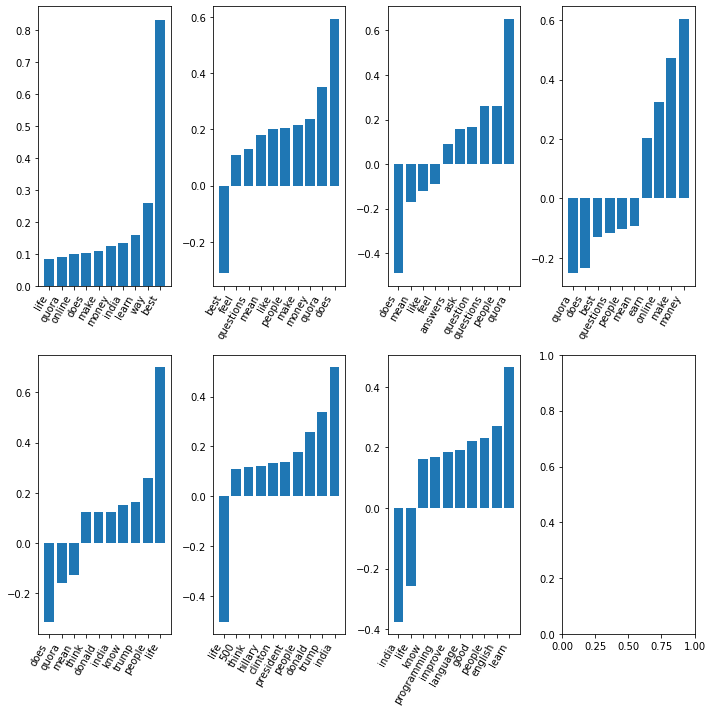

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

interpreatation:
# Plot 1 
This topic can be categorized for questions which are related "best way to learn to make money online"
# Plot 2 :
May be can be interpreted like "does qoura make money on questions from people"
#plot 3:
Not able to interpret properly but this is related to "asking questions on qoura "

#plot 4 :
May be related to how to "does answers to questions on qoura are liked by people" but not very appropriate

# plot 5:
"talking about how much does donald trump know about life in india"

# plot 6 :
Talking about "trump and clinton people in India". Even this we are not able to interpret completely"

# plot 7 :

"How to learn english language or programming language in India"

# Based on this topics, it was able to identify few patterns but it was not able to clearly distinguish between topics

In [ ]:
topic_train = model.transform(train_vectors)

In [ ]:
topic_train.shape

(323431, 7)

In [ ]:
topic_train[0]

array([ 0.01463236,  0.01320384, -0.00331768, -0.00278418,  0.0189305 ,
        0.00227534,  0.00801581])

In [ ]:
topic_train[0].round(2)

array([ 0.01,  0.01, -0.  , -0.  ,  0.02,  0.  ,  0.01])

In [ ]:
topic_train[0].argmax()

4

##### this means that our models thinks that first article belongs to topic 1

In [ ]:
train['Topic'] = topic_train.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.iloc[1:10,:]

,Question,Topic
341847,"Cars in India: Which one is better, Honda Amaz...",5
104587,What is your feedback about the Volkswagen Ven...,1
137963,Why is it so hard to get a Networking (Cisco) ...,5
191510,What is rave party?,5
202816,How much PHP is hard?,6
105270,What are some examples of companies who focuse...,0
157079,Who is tripitaka the Buddhist?,5
185940,How long does meth say in your urine?,1
182591,What are the advantages and disadvantages of b...,5


In [ ]:
topic_test = model.transform(test_vectors)

In [ ]:
test['Topic'] = topic_test.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.iloc[1:10,:]

,Question,Topic
86823,I am going to take admission in FIITJEE Kalu S...,0
112874,How can l improve my English？?,6
69029,"What is the translation of ""there was"" in French?",6
230113,What is a good mother like?,6
331771,Top ten websites?,0
258537,Does Ne-Yo currently have a girlfriend?,1
317699,How are cars made?,6
137428,What have you created with C#?,1
325074,What are your new year resolutions for 2017?,4


# NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
model = NMF(n_components=7,random_state=42)

In [ ]:
# fit the model to train data
model.fit(train_vectors)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
len(tfidf.get_feature_names())

34939

In [ ]:
import random

In [ ]:
for i in range(10):
    random_word_id = random.randint(0,4459)
    print(tfidf.get_feature_names()[random_word_id])

bhishma
bam
1929
1607
aviato
aren
acetaminophen
antichrist
bdm
adaptation


In [ ]:
len(model.components_)

7

In [ ]:
model.components_

array([[1.16891052e-04, 4.63910484e-02, 2.24126333e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54718084e-03, 2.89937583e-03, 0.00000000e+00, ...,
        2.93972763e-06, 3.30326239e-03, 2.93972763e-06],
       [7.24600650e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.24265168e-04, 3.55668872e-03, 0.00000000e+00, ...,
        1.57732489e-06, 0.00000000e+00, 1.57732489e-06],
       [1.09454822e-03, 1.15879940e-02, 0.00000000e+00, ...,
        1.20060902e-05, 0.00000000e+00, 1.20060902e-05],
       [6.14802573e-04, 0.00000000e+00, 0.00000000e+00, ...,
        3.31075318e-05, 0.00000000e+00, 3.31075318e-05]])

In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['places', 'phone', 'lose', 'buy', 'laptop', 'time', 'movie', '2016', 'ways', 'weight', 'books', 'book', 'movies', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['exist', 'compare', 'look', 'cost', 'really', 'girl', 'love', 'long', 'sex', 'time', 'work', 'feel', 'like', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['post', 'answered', 'use', 'improvement', 'delete', 'easily', 'asked', 'google', 'answer', 'answers', 'ask', 'question', 'people', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['internet', 'rupee', 'home', 'easy', 'notes', '500', '1000', 'black', 'youtube', 'ways', 'way', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['like', 'change', 'moment', 'employees', 'want', 'real', 'love', 'day', 'things', 'important', 'thing', 'know', 'meaning', 'purpose', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['pakistan', 'war', 'people', '1000', 'notes', '500', 'win', 'think', 'did', 'hillary', 'clinton', 'president', 'donald', 'tr

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

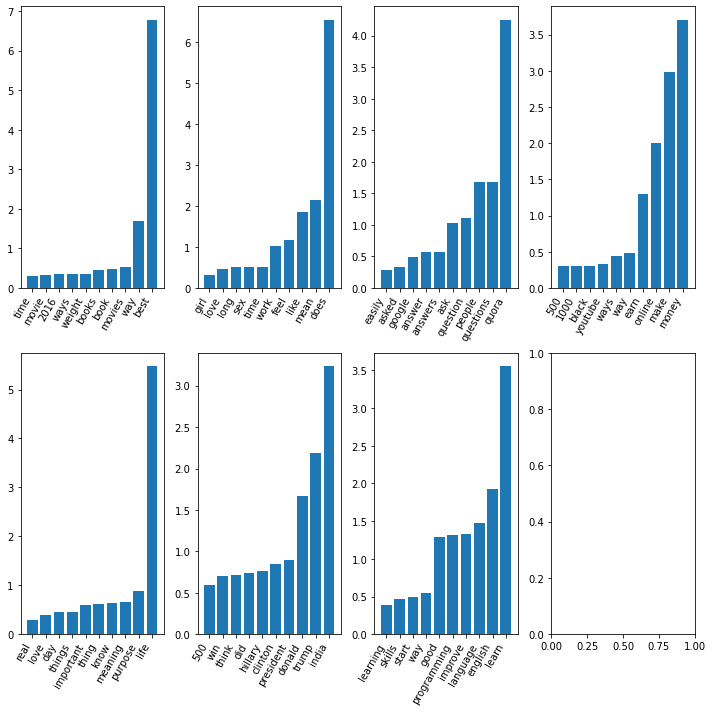

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

Plot 1:

"Best movies or books in 2016" 

PLot 2:

"relation between long sex time with loving a girl"

Plot 3:

"Qoura questions that can be easily asked on google"

Plot 4:

"making money through online using youtube and also about 500 and 1000 money"

Plot 5:
"purpose of life to know important things that you really love"
Plot 6:
"What india thinks will win between trump and clinton"

PLot 7:
"learn english language and programming"

Some of the interpretations match with truncated svd but still not able to segregate few topics and not able to interprate few topics"

In [ ]:
topic_train = model.transform(train_vectors)

In [ ]:
topic_train[0].argmax()

4

#####  This means that our model thinks that the first article belongs to topic #4.


In [ ]:
train['Topic'] = topic_train.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.iloc[1:10,:]

,Question,Topic
341847,"Cars in India: Which one is better, Honda Amaz...",5
104587,What is your feedback about the Volkswagen Ven...,1
137963,Why is it so hard to get a Networking (Cisco) ...,5
191510,What is rave party?,5
202816,How much PHP is hard?,6
105270,What are some examples of companies who focuse...,5
157079,Who is tripitaka the Buddhist?,5
185940,How long does meth say in your urine?,1
182591,What are the advantages and disadvantages of b...,5


In [ ]:
topic_test = model.transform(test_vectors)

In [ ]:
test['Topic'] = topic_test.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.iloc[1:10,:]

,Question,Topic
86823,I am going to take admission in FIITJEE Kalu S...,0
112874,How can l improve my English？?,6
69029,"What is the translation of ""there was"" in French?",6
230113,What is a good mother like?,6
331771,Top ten websites?,6
258537,Does Ne-Yo currently have a girlfriend?,1
317699,How are cars made?,6
137428,What have you created with C#?,1
325074,What are your new year resolutions for 2017?,5


## Randomized SVD

In [ ]:
from sklearn.decomposition import randomized_svd
u, s, v = randomized_svd(train_vectors,n_components=7)

In [ ]:
len(tfidf.get_feature_names())

34939

In [ ]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['time', 'programming', 'book', 'books', 'ways', 'life', 'quora', 'online', 'does', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['ask', 'earn', 'question', 'online', 'work', 'life', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['delete', 'easily', 'earn', 'asked', 'online', 'google', 'make', 'answer', 'answers', 'money', 'ask', 'question', 'people', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['rs', 'easy', 'rupee', 'india', 'youtube', 'black', 'ways', 'way', 'notes', '1000', '500', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['important', 'thing', 'things', 'did', 'love', 'like', 'think', 'donald', 'purpose', 'good', 'india', 'trump', 'know', 'people', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['war', 'pakistan', 'did', '1000', 'notes', '500', 'win', 'think', 'hillary', 'clinton', 'president', 'people', 'donald', 'trump'

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

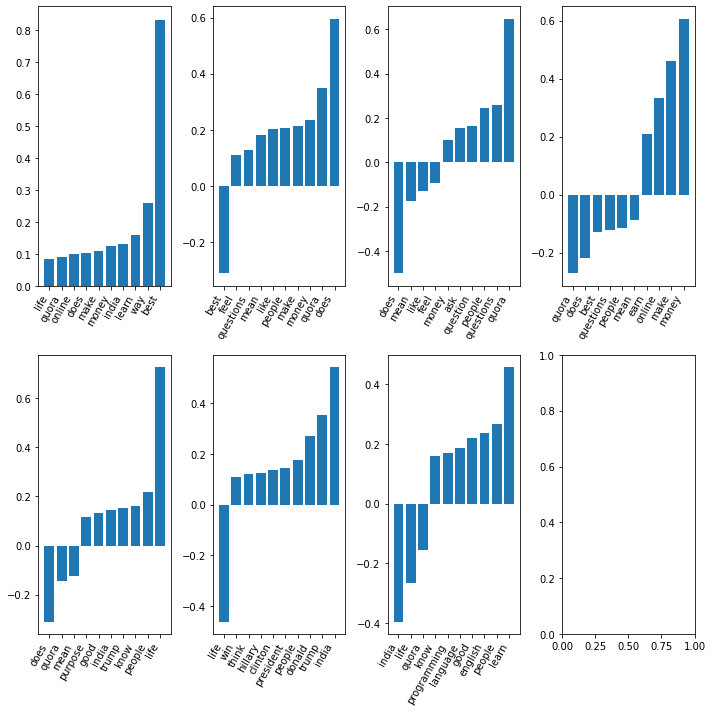

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 7
fig, axes = plt.subplots(2,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

This interpretation is more similar to truncated svd

Even randomized SVD is not able to segrate into topics clearly.

# randomized SVD using Facebook

In [ ]:
!pip install fbpca

  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11376 sha256=633c780349f468e7a05a3cd528ddc5fca48c9fbd05536372c08e3ac28083906d
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
Successfully built fbpca


In [ ]:
import fbpca
u, s, v = fbpca.pca(train_vectors,7)

In [ ]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['clinton', 'time', 'love', 'ask', 'sex', 'work', 'questions', 'donald', 'feel', 'mean', 'trump', 'people', 'quora', 'like', 'does']


THE TOP 15 WORDS FOR TOPIC #1
['easily', 'google', 'india', 'answer', 'answers', 'good', 'earn', 'ask', 'question', 'online', 'make', 'people', 'questions', 'money', 'quora']


THE TOP 15 WORDS FOR TOPIC #2
['answers', 'answer', 'language', 'purpose', 'ask', 'people', 'skills', 'learn', 'question', 'questions', 'difference', 'improve', 'english', 'life', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['presidential', '2016', 'election', 'difference', 'war', 'india', 'world', 'hillary', 'president', 'win', 'clinton', 'did', 'learn', 'donald', 'trump']


THE TOP 15 WORDS FOR TOPIC #4
['new', 'know', 'black', 'english', 'indian', 'rupee', 'improve', 'rs', 'lose', '1000', 'notes', 'weight', '500', 'india', 'like']


THE TOP 15 WORDS FOR TOPIC #5
['weight', 'mean', 'think', '1000', 'notes', '500', 'donald', 'english', 'questions', 'tr

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

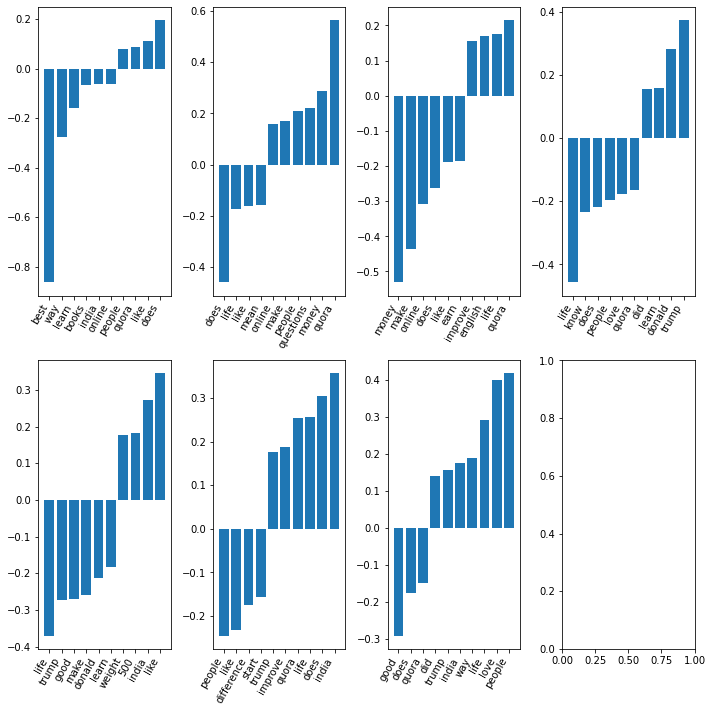

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

If we compare interpretations truncated svd, randomized svd are much better than facebook svd

#LDA




In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
model = LatentDirichletAllocation(n_components=7,random_state=42)

In [ ]:
# fit the model to train data
model.fit(train_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
len(tfidf.get_feature_names())

34939

In [ ]:
import random

In [ ]:
for i in range(10):
    random_word_id = random.randint(0,4461)
    print(tfidf.get_feature_names()[random_word_id])

asana
amontillado
bipolar
110v
americans
5th
ao
bbs
balloons
advantageous


In [ ]:
single_topic = model.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([32875,  9205, 34769, ..., 25299, 25306, 25348])

In [ ]:
# Word least representative of this topic
single_topic[32875]

0.1428572771934339

In [ ]:
# Word most representative of this topic
single_topic[25348]

2544.305144779443

In [ ]:
top_word_indices = single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

google
ask
does
instagram
notes
1000
500
question
questions
quora


In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['money', 'answer', 'youtube', 'facebook', 'people', 'google', 'ask', 'does', 'instagram', 'notes', '1000', '500', 'question', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #1
['don', 'work', 'feel', 'increase', 'mind', 'difference', 'password', 'skills', 'people', 'like', 'best', 'sex', 'does', 'improve', 'english']


THE TOP 15 WORDS FOR TOPIC #2
['does', 'company', 'prepare', 'study', 'job', 'learning', 'book', 'business', 'engineering', 'books', 'good', 'india', 'start', 'learn', 'best']


THE TOP 15 WORDS FOR TOPIC #3
['buy', 'app', 'time', 'does', 'travel', 'number', 'mobile', 'android', 'iphone', 'earn', 'phone', 'make', 'best', 'online', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['fat', 'good', 'does', 'language', 'new', 'india', 'way', 'hillary', 'clinton', 'best', 'president', 'donald', 'lose', 'weight', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['purpose', 'like', 'pakistan', 'believe', 'country', 'think', 'things', 'did', 'meaning', 'war', '

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

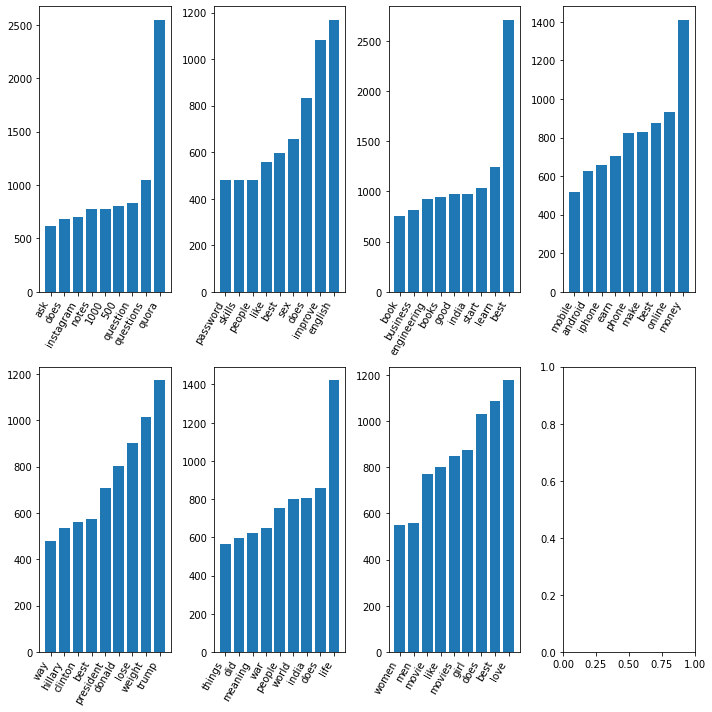

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 7
fig, axes = plt.subplots(2,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=9, ax=ax)
    
plt.tight_layout()

PLot :1

Questions related 500 and 1000 notes 

pLot 2:
best way to improve english and people skills. I don't know how password and sex realted to this topic.

Plot 3:

best books to learn engineering,business to start with.

PLot 4:
Best way to earn money online using mobile phone that uses android or iphone.

PLot 5:
About trump vs hilary clinton who is best among 

PLot 6:
does indian people involve in world war.

PLot 7:
what movies does men,women,girls like ?



Out of all the technoques LDA has good interpretation of topics. 



Use Transform to get topic id for each document for training data

In [ ]:
topic_train = model.transform(train_vectors)

In [ ]:
topic_train[0].round(2)

array([0.04, 0.34, 0.47, 0.04, 0.04, 0.04, 0.04])

In [ ]:
topic_train[0].argmax()

2

This means that our model thinks that the first article belongs to topic #2

In [ ]:
train['Topic'] = topic_train.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.iloc[1:10,:]

,Question,Topic
341847,"Cars in India: Which one is better, Honda Amaz...",4
104587,What is your feedback about the Volkswagen Ven...,1
137963,Why is it so hard to get a Networking (Cisco) ...,2
191510,What is rave party?,0
202816,How much PHP is hard?,2
105270,What are some examples of companies who focuse...,1
157079,Who is tripitaka the Buddhist?,2
185940,How long does meth say in your urine?,1
182591,What are the advantages and disadvantages of b...,1


In [ ]:
topic_test = model.transform(test_vectors)

In [ ]:
test['Topic'] = topic_test.argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.iloc[1:10,:]

,Question,Topic
86823,I am going to take admission in FIITJEE Kalu S...,2
112874,How can l improve my English？?,1
69029,"What is the translation of ""there was"" in French?",5
230113,What is a good mother like?,6
331771,Top ten websites?,2
258537,Does Ne-Yo currently have a girlfriend?,4
317699,How are cars made?,2
137428,What have you created with C#?,4
325074,What are your new year resolutions for 2017?,4
